# Initial data exploration

## Data description

In this assignment you will use [MovieLens 100K dataset](https://grouplens.org/datasets/movielens/100k/) consisting user ratings to movies.

**General information about the dataset:**
* It consists of 100,000 ratings from 943 users on 1682 movies
* Ratings are ranged from 1 to 5
* Each user has rated at least 20 movies
* It contains simple demographic info for the users (age, gender, occupation, zip code)


## Dataset Loading

In [1]:
import pandas as pd
from zipfile import ZipFile
import os

In [2]:
if not os.path.exists('../data/raw/ml-100k'):
    with ZipFile('../data/raw/ml-100k.zip', 'r') as zip_ref:
        zip_ref.extractall('../data/raw')

In [3]:
data = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [4]:
user = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [5]:
item = pd.read_csv('../data/raw/ml-100k/u.item', sep='|', encoding='latin-1',
                     names=['item_id', 'movie_title', 'release_date', 'video_release_date', 
                          'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

## Initial data exploration 

### Get information about u.data

In [6]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

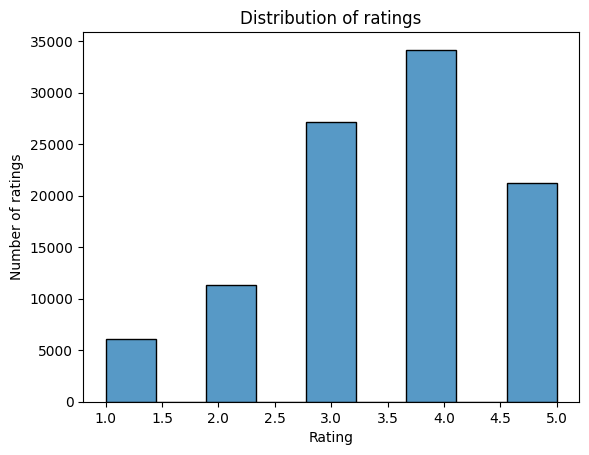

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.histplot(data['rating'], bins=9)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Distribution of ratings')
plt.show()

**Conclusion:**
* No missing data
* The rating is mostly in the range of 3 to 5
* There is a "timestamp" column that is not needed

### Get information about u.user

In [10]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [12]:
user.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

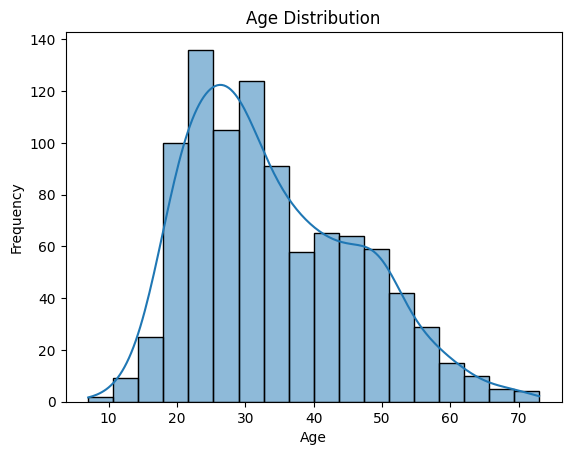

In [13]:
# Plot
sns.histplot(user['age'], bins=18, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

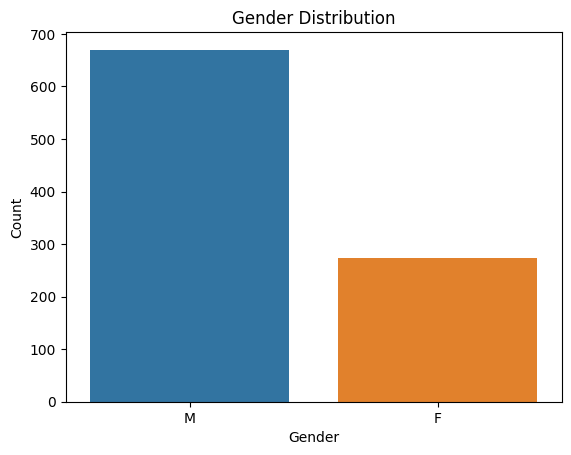

In [14]:
# Plot
sns.countplot(x='gender', data=user)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

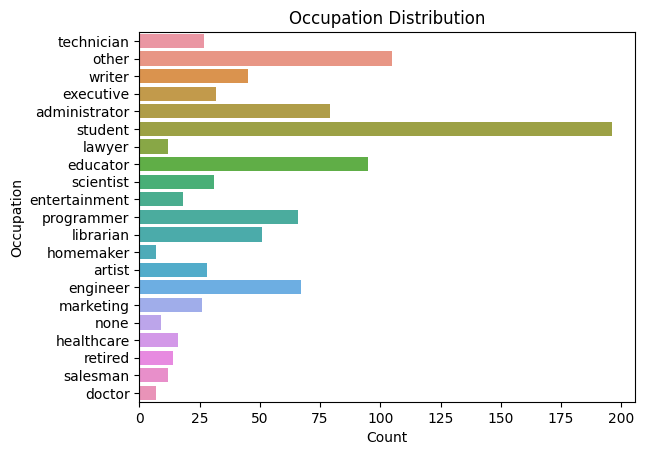

In [15]:
# Plot
sns.countplot(y='occupation', data=user)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

**Conclusion:**
* No missing data
* Age is mostly in the range of 20 to 35
* There are twice as many men as women
* The users are mostly students 
* There is a "zip_code" column that is not needed

### Get information about u.item

In [16]:
item.head()

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [18]:
item.isnull().sum()

item_id                  0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [19]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
          'War', 'Western']

# Create a DataFrame for genre counts
genre_counts = item[genres].sum().sort_values(ascending=False)

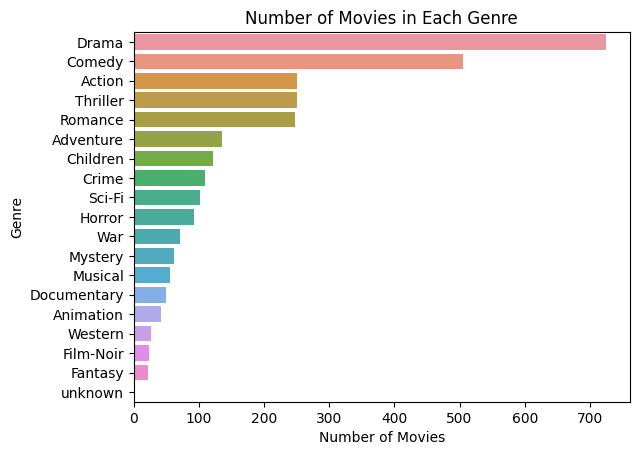

In [20]:
# Plot
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Conclusion:**
* There is missing data, but since I don't use these columns, I don't need to do anything with them
* The most popular genres are drama and comedy 
* Not needed columns 'movie_title', 'release_date', 'video_release_date' and 'IMDb_URL'

## Preprocessing data


### Preprocessing u.data

In [21]:
# drop the unneeded column
data = data.drop(['timestamp'], axis=1)

data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### Preprocessing u.item

In [22]:
# drop the unneeded columns
item = item.drop(['movie_title', 'release_date', 'video_release_date', 'IMDb_URL'], axis=1)

item.head()

,item_id,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### Preprocessing u.user

In [23]:
# drop the unneeded column
user = user.drop(['zip_code'], axis=1)

In [24]:
# encode gender
user['gender'] = user['gender'].map({'M': 0, 'F': 1})

In [25]:
from sklearn.preprocessing import LabelEncoder

# encode occupation using LabelEncoder
label_encoder = LabelEncoder()
user['occupation'] = label_encoder.fit_transform(user['occupation'])

In [26]:
user.head()

,user_id,age,gender,occupation
0,1,24,0,19
1,2,53,1,13
2,3,23,0,20
3,4,24,0,19
4,5,33,1,13


### Merge data

In [27]:
data = pd.merge(data, user, on='user_id')
data = pd.merge(data, item, on='item_id')

In [28]:
data.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split data

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Split the data into training and validation sets
train, val = train_test_split(train, test_size=0.2, random_state=42)

### Save data

In [30]:
train.to_csv('../data/interim/train.csv', index=False)
test.to_csv('../data/interim/test.csv', index=False)
test.to_csv('../benchmark/data/test.csv', index=False)
val.to_csv('../data/interim/val.csv', index=False)
data.to_csv('../data/interim/data.csv', index=False)

In [32]:
import shutil

if os.path.exists('../data/raw/ml-100k'):
    shutil.rmtree('../data/raw/ml-100k')